In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv("weather_dataset\\weatherHistory.csv")

In [8]:
df=df.dropna()

In [14]:
required_columns = ["Temperature (C)","Humidity","Wind Speed (km/h)","Pressure (millibars)"]
X = df[required_columns].to_numpy()

# Analysing Data 

In [16]:
print(X.shape)

(95936, 4)


In [18]:
print(X)

[[9.47222222e+00 8.90000000e-01 1.41197000e+01 1.01513000e+03]
 [9.35555556e+00 8.60000000e-01 1.42646000e+01 1.01563000e+03]
 [9.37777778e+00 8.90000000e-01 3.92840000e+00 1.01594000e+03]
 ...
 [2.20388889e+01 5.60000000e-01 8.98380000e+00 1.01566000e+03]
 [2.15222222e+01 6.00000000e-01 1.05294000e+01 1.01595000e+03]
 [2.04388889e+01 6.10000000e-01 5.87650000e+00 1.01616000e+03]]


# Before Normalization

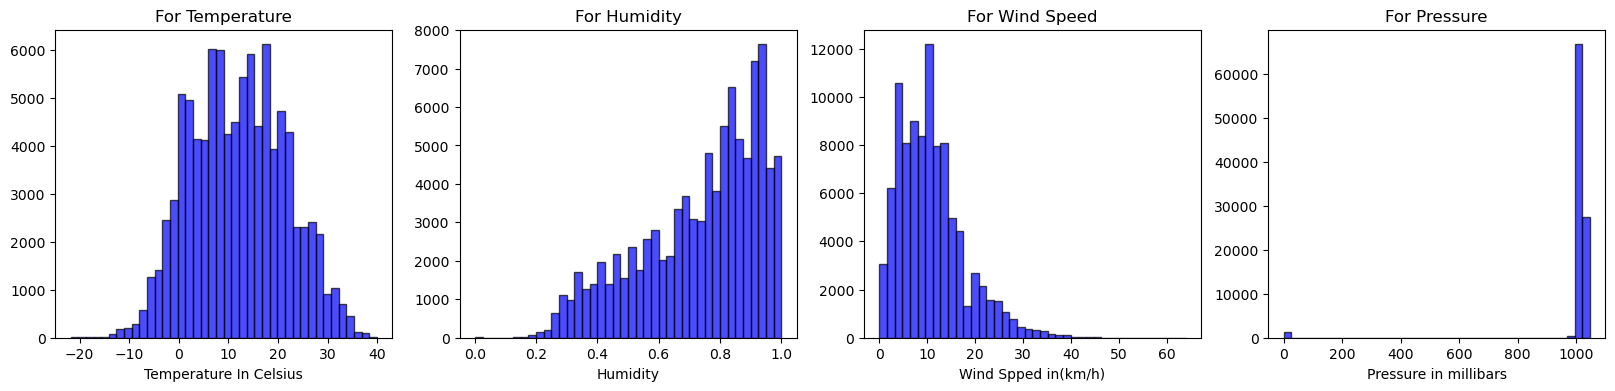

In [49]:


plt.figure(figsize=(20,4))
plt.subplot(1,4,1)
plt.hist(X[:,0],bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title("For Temperature")
plt.xlabel("Temperature In Celsius")



plt.subplot(1,4,2)

plt.hist(X[:,1],bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title("For Humidity")
plt.xlabel("Humidity")



plt.subplot(1,4,3)
plt.hist(X[:,2],bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title("For Wind Speed")
plt.xlabel("Wind Spped in(km/h)")




plt.subplot(1,4,4)
plt.hist(X[:,3],bins=40, color='blue', edgecolor='black', alpha=0.7)
plt.title("For Pressure")
plt.xlabel("Pressure in millibars")

plt.show()



# After Normalization

In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [56]:
print(X_scaled)

[[-0.25795124  0.79274784  0.47896434  0.10215155]
 [-0.27014132  0.63947007  0.49990155  0.10641498]
 [-0.2678194   0.79274784 -0.99361974  0.10905831]
 ...
 [ 1.0550949  -0.89330762 -0.26314359  0.10667079]
 [ 1.00111025 -0.68893726 -0.03981331  0.10914358]
 [ 0.88791662 -0.63784467 -0.71213053  0.11093422]]


# Model Training

In [66]:
captured_labels = np.zeros((60,X_scaled.shape[0]))
captured_loss = np.zeros(60)
for i in range(60):
   kmeans = KMeans(n_clusters = 7)
   kmeans.fit(X_scaled)
   labels = kmeans.labels_
   loss = kmeans.inertia_
   captured_loss[i]=loss
   captured_labels[i]=labels
   print(f"Iteration {i} loss: {loss}")

Iteration 0 loss: 82096.07673292424
Iteration 1 loss: 82098.23031433138
Iteration 2 loss: 82096.09887615246
Iteration 3 loss: 82096.14993556445
Iteration 4 loss: 82096.77553811875
Iteration 5 loss: 82796.30834867674
Iteration 6 loss: 82796.1089069086
Iteration 7 loss: 82096.24868243808
Iteration 8 loss: 82782.70966247047
Iteration 9 loss: 82098.17578682523
Iteration 10 loss: 82096.37325102025
Iteration 11 loss: 82094.70899450491
Iteration 12 loss: 82097.31619824194
Iteration 13 loss: 82784.64344052905
Iteration 14 loss: 82096.75030366413
Iteration 15 loss: 82095.95972397062
Iteration 16 loss: 82096.88078488529
Iteration 17 loss: 82795.38624888584
Iteration 18 loss: 82095.22629408831
Iteration 19 loss: 82795.62113235357
Iteration 20 loss: 82794.34716330768
Iteration 21 loss: 82796.24567836881
Iteration 22 loss: 82097.70008939102
Iteration 23 loss: 82097.05449882225
Iteration 24 loss: 82794.72149854571
Iteration 25 loss: 82795.51338782781
Iteration 26 loss: 82796.24567836881
Iteration 27

# Choosing the labels with minimum loss

In [79]:
print(captured_labels.shape)
print(captured_loss.shape)

(60, 95936)
(60,)


In [83]:
minimum_loss_index = np.argmin(captured_loss)
label = captured_labels[minimum_loss_index]


[6. 6. 0. ... 5. 5. 5.]


# Evaluation

In [86]:
sil_score = silhouette_score(X_scaled, labels)
print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.27803541517768526


# Cluster Visualisation

In [95]:
#Performing PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X_scaled)

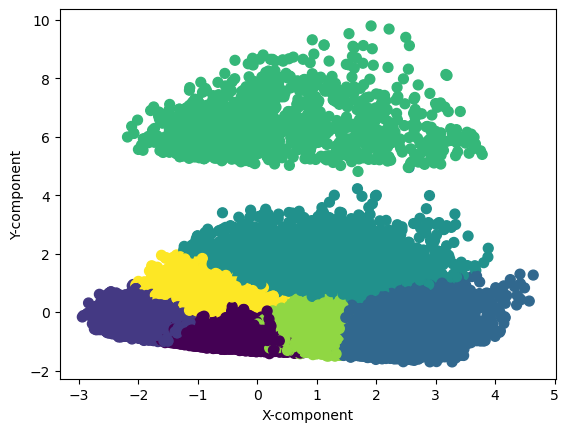

In [97]:
plt.scatter(reduced_data[:,0],reduced_data[:,1],c = label,cmap='viridis', s=50)
plt.xlabel("X-component")
plt.ylabel("Y-component")
plt.show()